# CREDIT CARD FRAUD DETECTION

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [6]:
path_to_dataset_train = 'D:\\DATASETS\\Kaggle\\Credit Card Transactions Fraud Detection Dataset\\fraudTrain.csv'
path_to_dataset_test = 'D:\\DATASETS\\Kaggle\\Credit Card Transactions Fraud Detection Dataset\\fraudTest.csv'

In [9]:
df_train = pd.read_csv(path_to_dataset_train)
df_test = pd.read_csv(path_to_dataset_test)

In [10]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [14]:
list = df_train.duplicated()
for x in list:
    if x == True: print(list.index(x))

In [15]:
list = df_test.duplicated()
for x in list:
    if x == True: print(list.index(x))

## Analysis

In [16]:
corr_matrix = df_train[['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']].corr()
corr_matrix

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,0.001769,1.000000,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
lat,-0.059271,-0.001926,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.000354,-0.000293,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.058942,-0.001873,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721
is_fraud,-0.000981,0.219404,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000


<Axes: >

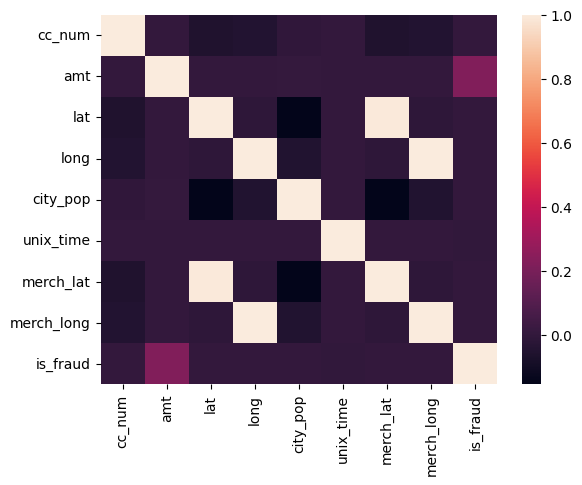

In [17]:
sns.heatmap(corr_matrix)

The above heatmap shows that the fraud cases is most related to the 'amt' feature

In [18]:
df_train['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

<Axes: ylabel='amt'>

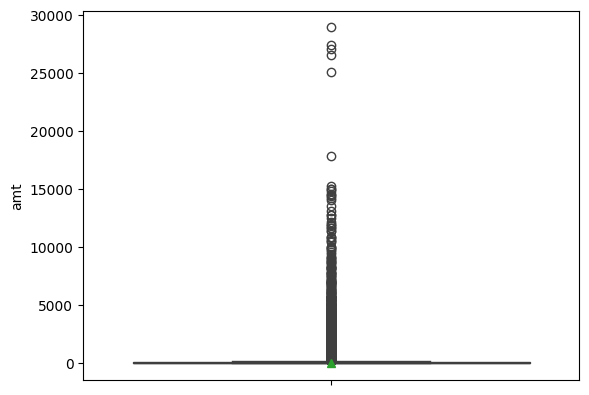

In [19]:
sns.boxplot(df_train['amt'], showmeans = True)

<Axes: >

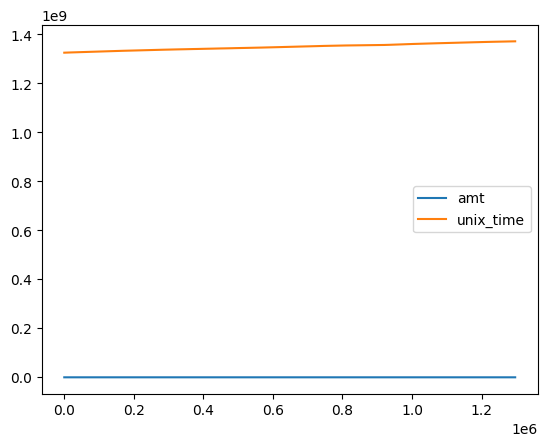

In [20]:
df_train[['amt','unix_time']].plot()

<Axes: title={'center': 'Distribution of non-fraud(0.0) fraud(1.0) cases along the "amt" feature'}, xlabel='is_fraud', ylabel='amt'>

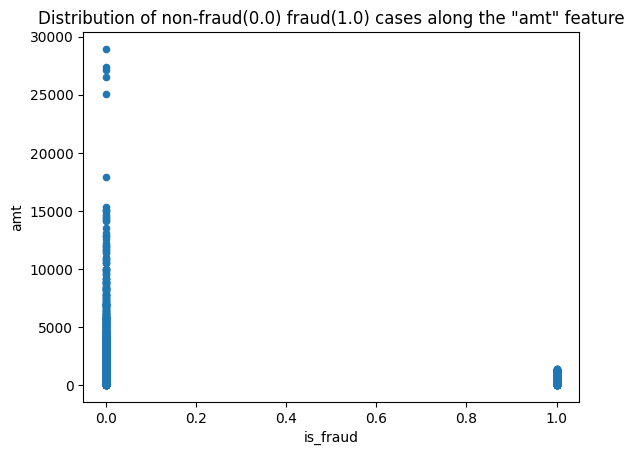

In [26]:
df_train.plot(kind = 'scatter', x = 'is_fraud',y = 'amt', title = 'Distribution of non-fraud(0.0) fraud(1.0) cases along the "amt" feature')

<Axes: title={'center': 'Distribution of "amt" feature'}, ylabel='Frequency'>

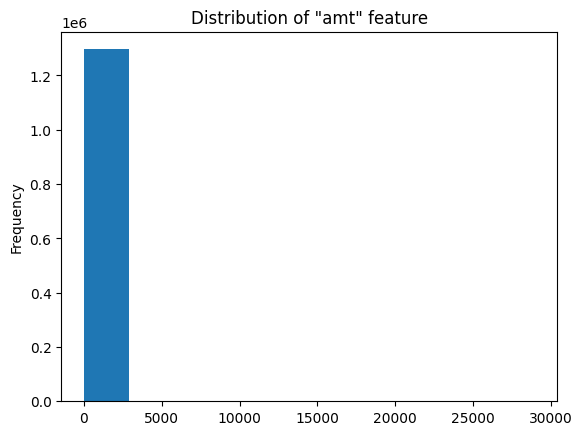

In [25]:
df_train['amt'].plot(kind = 'hist', title = 'Distribution of "amt" feature')

## Preprocessing Data

**Prepairing X (i.e. features) and y (i.e. target) values**

In [28]:
X_train = df_train[['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long']]
X_test = df_test[['cc_num','amt','lat','long','city_pop','unix_time','merch_lat','merch_long']]
y_train = df_train['is_fraud']
y_test = df_test['is_fraud']

**Scaling X values (i.e feature values)**

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## Models

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf1 = LogisticRegression()
clf1.fit(scaled_X_train,y_train)

LogisticRegression()

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf3 = RandomForestClassifier(n_estimators = 20, random_state = 0)
clf3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

## Model prediction and evaluation

In [60]:
model_list = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

In [61]:
y_train_pred1 = clf1.predict(scaled_X_train)
y_test_pred1 = clf1.predict(scaled_X_test)
y_train_pred2 = clf2.predict(X_train)
y_test_pred2 = clf2.predict(X_test)
y_train_pred3 = clf3.predict(X_train)
y_test_pred3 = clf3.predict(X_test)

y_train_pred = np.vstack((y_train_pred1,y_train_pred2,y_train_pred3))
y_test_pred = np.vstack((y_test_pred1,y_test_pred2,y_test_pred3))

In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

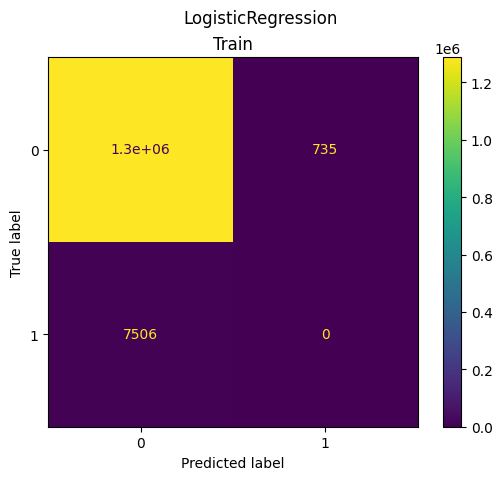

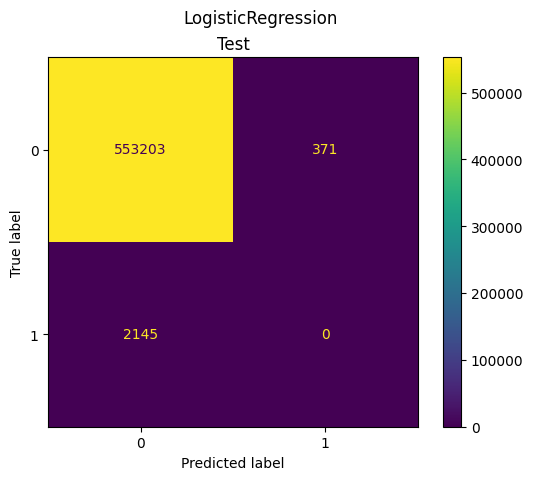

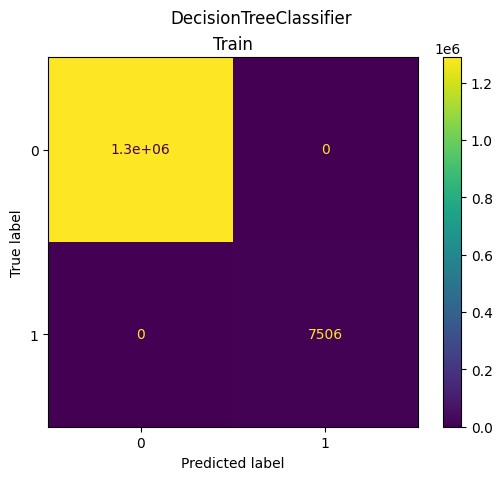

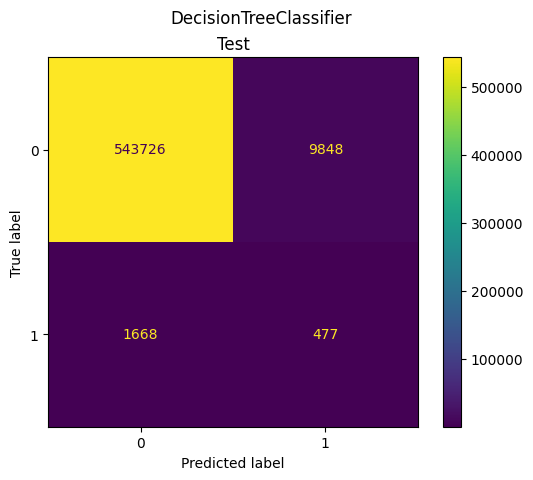

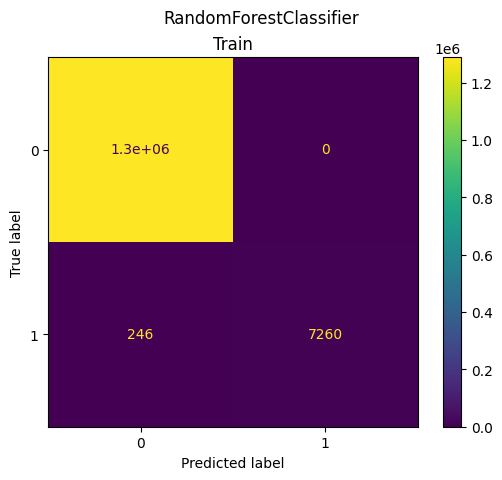

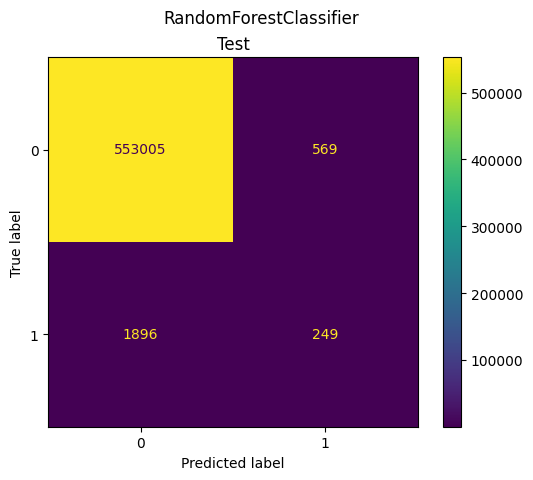

In [63]:
def plot_confusion_matrix():
    for i in range(len(model_list)):
        train_ConfusionMatrix = confusion_matrix(y_train,y_train_pred[i])
        test_ConfusionMatrix = confusion_matrix(y_test,y_test_pred[i])
        train_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = train_ConfusionMatrix, display_labels=[0,1])
        test_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_ConfusionMatrix, display_labels=[0,1])

        #plt.subplot(1,2,1)
        train_cm_display.plot()
        plt.title('Train')
        plt.suptitle(model_list[i])
        #plt.subplot(1,2,2)
        test_cm_display.plot()
        plt.title('Test')

        plt.suptitle(model_list[i])
        plt.show()

plot_confusion_matrix()

In [64]:
def models_accuracy():
    print('Accuracy of the models :')
    for i in range(len(model_list)):
        print(model_list[i], ' : Train Accuracy = ', accuracy_score(y_train,y_train_pred[i]), ', Test Accuracy = ', accuracy_score(y_test,y_test_pred[i]))

models_accuracy()

Accuracy of the models :
LogisticRegression  : Train Accuracy =  0.9936445138527388 , Test Accuracy =  0.9954725319810912
DecisionTreeClassifier  : Train Accuracy =  1.0 , Test Accuracy =  0.9792772966193346
RandomForestClassifier  : Train Accuracy =  0.9998102839956041 , Test Accuracy =  0.9955643049814744


In [65]:
def model_classification_report():
    for i in range(len(model_list)):
        print('CLASSIFICATION REPORT OF ' + model_list[i] +  ' : ')
        print('For Train data :')
        print(classification_report(y_train,y_train_pred[i]))
        print('For Test data:')
        print(classification_report(y_test,y_test_pred[i]))

model_classification_report()

CLASSIFICATION REPORT OF LogisticRegression : 
For Train data :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675

For Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

CLASSIFICATION REPORT OF DecisionTreeClassifier : 
For Train data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                       